In [1]:
# data operations
import numpy as np
import pandas as pd

import os

# visualization
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import axes3d

# For regression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import scale
#import sklearn.linear_model as skl_lm
from sklearn.metrics import mean_squared_error, r2_score
import statsmodels.api as sm
import statsmodels.formula.api as smf  #Provides a formula-based interface

%matplotlib inline
#plt.style.use('seaborn-white')

homedir=os.environ['HOME'] + '/'
datapath=homedir+ "datasets/"
advtdatafile=datapath + "Advertising.csv"

In [2]:
dataset = pd.read_csv(advtdatafile)

In [3]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   Radio       200 non-null    float64
 3   Newspaper   200 non-null    float64
 4   Sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


In [4]:
dataset.describe()

,Unnamed: 0,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,147.042500,23.264000,30.554000,14.022500
std,57.879185,85.854236,14.846809,21.778621,5.217457
min,1.000000,0.700000,0.000000,0.300000,1.600000
25%,50.750000,74.375000,9.975000,12.750000,10.375000
50%,100.500000,149.750000,22.900000,25.750000,12.900000
75%,150.250000,218.825000,36.525000,45.100000,17.400000
max,200.000000,296.400000,49.600000,114.000000,27.000000


In [5]:
## Check whether any column has null entries
dataset.isnull().sum()

Unnamed: 0    0
TV            0
Radio         0
Newspaper     0
Sales         0
dtype: int64

### Quick check basics - random data generation

* Random normal distribution (1000 floats)

In [6]:
rnd_normalf = np.random.randn(1000)
print(type(rnd_normalf))

<class 'numpy.ndarray'>


* Choice of 5 samples from previous random samples of 1000

In [7]:
replace_samples = 5
sample_data = np.random.choice(rnd_normalf, replace_samples, replace=True)
print(f"Sample data -> {sample_data}")

Sample data -> [-0.84417878 -2.00396471  0.36729055 -0.51223799 -1.31488368]


In [8]:
import random
num_smpls = 20
rnd_sample = random.sample(range(1, 1000), num_smpls)
print(type(rnd_sample))
#rnd_sample

<class 'list'>


#### Convert `python list` to `numpy ndarray`
* Python `List` to `numpy array` -> 1D array
* Add pad elements at the end of the array based on columns
* Reshape the array to suitable number of rows and columns
* There could be a better method - but this is one method


In [ ]:
# list 
numlist = [ 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 10 ]
print(f"numlist -> {numlist}, size -> {len(numlist)}")
num_cols = 2
# calculate remainder
rem = len(numlist) % num_cols
# remaining cols for padding
pad = num_cols - rem
print(f"pad numbers -> {pad}")
# convert list to numpy array
numarr = np.array(numlist)
print(f"type numarr -> {type(numarr)}, shape -> {numarr.shape}")
print(f"numarr -> {numarr}")
numarr_pad = np.pad(numarr, pad_width=(0, rem), mode='constant', constant_values=0)
# reshape the numpy array
numrshp = numarr_pad.reshape(-1, 2)
print(f"type numrshp -> {type(numrshp)}, shape -> {numrshp.shape}")
# print(f"numrshp -> {numrshp}")

numlist -> [1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 10], size -> 11
pad numbers -> 1
type numarr -> <class 'numpy.ndarray'>, shape -> (11,)
numarr -> [ 1  2  3  4  5  6  7  8  9  0 10]
type numrshp -> <class 'numpy.ndarray'>, shape -> (6, 2)


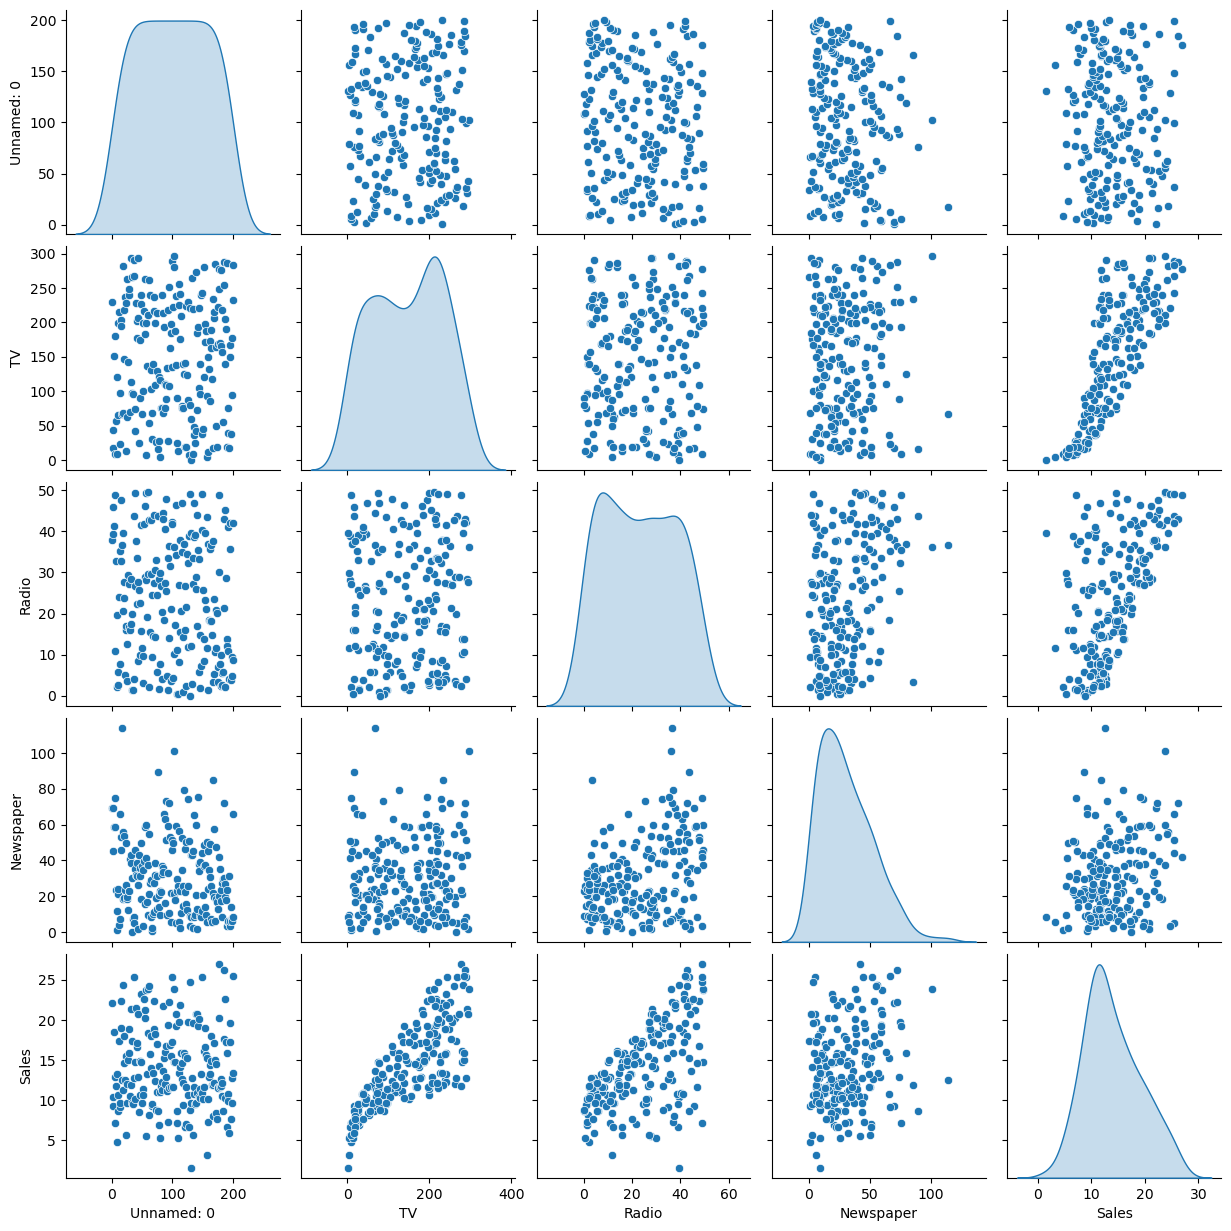

In [10]:
import seaborn as sns
# Check for linearity. We can also draw the pairplot for 
# checking the relationship
sns.pairplot(dataset, diag_kind='kde')